# First Order Model for a Single Heater

![Comsol model of Temperature Control Laboratory](figures/arduino_comsol.png)

## Learning Goals

Mathematical modeling is an integral part of process control. Process models come in many forms for different purposes, ranging from the barest of information about a process to sophisticated simulation involving millions of computational nodes.  

Our purpose here is to demonstrate simple approaches that provide with insight about the qualitative nature of process dynamics. We show how to construct simple models from first-principles understanding of the processes, and how to fit those models to experimental data.

In this notebook we:

* Construct a first-order lumped model for a single heater/sensor assembly on the Temperature Control Laboratory
* Relate this model to the previously enountered first-order linear systems
* Demonstrate how to estimate parameters from step test experiments.

## First-order model for a single heater/sensor assembly

### Energy Balance

We'll be begin by developing a model for one of the heater/sensor assemblies located on the Temperature Control Laboratory. The basic outline of an energy balaance is given by

$$\fbox{Rate of energy accumulation} = \fbox{Rate of energy in flow} - \fbox{Rate of energy outflow}$$

In the absence of material flows, kinetic or potential energy, or chemical changes, the changes in sensible temperature is the only form of energy accumulation. If we assume the whole heater/sensor assembly is at uniform temperature $T_1$, with mass $m$, and a constant and average specific heat capacity $\hat{C}_p$,

$$\fbox{Rate of energy accumulation} = m \hat{C}_p \frac{dT_1}{dt}$$

For the purposes of this model we will lump the mass and specific heat capacity into a single parameter representing the overall heat capacity of the assembly

$$C_p = m \hat{C}_p$$

The final expression for the rate of energy accumulation becomes

$$\fbox{Rate of energy accumulation} = C_p \frac{dT_1}{dt}$$

:::{admonition} Study Question

What are the units of $C_p$?

:::

### Energy inflow

The flow of energy into into the heater/sensor assembly is controlled by variable $u_1$, the percentage of maximum available power to the heater. As a safety feature to protect both the user and the equipment, the maximum power available to the heater is set by an Arduino parameter $P_1$ specified as an 8 bit integer value between 0 and 255. 

The actual power delivered to the heater is therefore proportional to the product $P_1u_1$

$$\fbox{Rate of energy in flow} \propto P_1 u_1$$

where

$$\begin{align*}
0 & \leq u_1 \leq 100 \\
0 & \leq P_1 \leq 255 
\end{align*}$$

An experimentally parameter $\alpha$ is introduced to establish the actual power delivered in units of watts

$$\fbox{Rate of energy in flow} = \alpha P_1 u_1$$

:::{admonition} Study Question

What are the units of $\alpha$, $P_1$, and $U_1$?

:::

:::{admonition} Study Question

How would determine $\alpha$ experimentally? What experiments would you perform? What equipment would you need in addition to that delivered with the Temperature Control Lab? 

:::

### Energy outflow

Energy flows out of the assembly primarily through convective heat transfer to the surrounding environment. At the relatively low operating temperatures of the device, the amount of radiative heat transfer is neglible. 

$$\fbox{Rate of energy outflow} = U_a(T_1 - T_{amb})$$

Parameters $U_a$ and $T_{amb}$ are the overall heat transfer coefficient and ambient temperature, respectively.

:::{admonition} Study Question

Do you agree with the assumptions embedded in this equation? What other considerations might apply?

:::

:::{admonition} Study Question

What are the units of $U_a$?

:::

:::{admonition} Study Question

How can you determine $T_{amb}$ in experiments you do with the Temperature Control Lab?

:::

### One-state model

Putting these terms together in the energy balance yields a first-order model for the response of the heater/sensor assembly on the Temperature Control Laboratory.

$$
\begin{align}
C_p\frac{dT_1}{dt} & = U_a(T_{amb} - T_1) + \alpha P_1u_1 \\
\end{align}
$$


## Parameter Estimation

At steady-state

$$0 = U_a(T_{amb} - T_1) + \alpha P_1u_1$$

which can be solved to give

$$T_1 = T_{amb} + \frac{\alpha}{


### Estimating $\alpha$

As it happens, the parameter $\alpha$ exhibits a mild temperature dependency due to the intrinisic properties of semiconductors. The following experiment sets to P1 to a value of 200 in the arbitrary units of the Arduino hardware, then sets U1 to 50%. The power delivered to the device is measured after reaching operating temperature. 

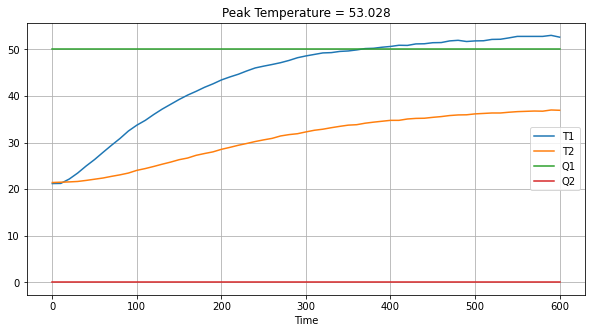

In [5]:
import pandas as pd

t_expt = 600

data_file = "data/Model_Data.csv"
connected = False

if connected:
    # run experiment and record data locally
    from tclab import TCLab, clock, Historian, Plotter
    with TCLab() as lab:
        h = Historian(lab.sources)
        p = Plotter(h, t_expt)
        lab.P1 = 200
        lab.U1 = 50
        for t in clock(t_expt, 10):
            print(t, lab.T1)
            p.update(t)

    h.to_csv(data_file)
else:
    # download previously recorded data from repository
    df = pd.read_csv("https://jckantor.github.io/cbe30338-2021/" + data_file)
    ax = df.plot("Time", figsize=(10, 5))
    ax.grid(True)
    ax.set_title(f"Peak Temperature = {df['T1'].max()}")

![](figures/Model_Data_Image.jpg)

Under these conditions, starting with an ambient temperature of 21 C, when the system reached steady-state the measured voltage was 5.10 volts with a current of 0.315 amps, or 1.61 watts, resulting in a peak temperature of 53 C

$$\alpha P_1 u_1 = 1.6 \text{ watts} \implies \alpha = \frac{1.6\text{watts}}{200 \times 50} = 0.00016 \frac{\text{watts}}{\text{units P1} \times \text{percent U1}}$$

:::{admonition} Study Question

What is the maximum power that could be delivered to the heater/sensor assembly?

:::

## Modeling Deviations from Steady State

### Steady State

We'll begin our analysis by investigating the steady-state response of this system to a steady-state input $\bar{u}_{1}$.  At steady-state all variables are constant so $\frac{dT_1}{dt} = 0$, which leaves 

$$\begin{align}
0 = U_a(T_{amb} - \bar{T}_1) + \alpha P_1\bar{u}_{1}
\end{align}$$

Solving for $\bar{T}_{1}$

$$\bar{T}_{1} = T_{amb} + \frac{\alpha P_1}{U_a}\bar{u}_{1}$$

:::{admonition} Study Question

In the cell below, write Python code to estimate the value of $U_a$.

:::

:::{admonition} Study Question

Using the results of this calculation, estimate the maximum acheivable temperature with this device.

:::

### Deviation Variables

In examining the response of the temperature control laboratory, we see the temperature is a deviation from ambient temperature, i.e.,

$$\begin{align}
T_1' = T_1 - T_{amb}
\end{align}$$

For process control purposes, we are often interested in the deviation of a process variable from a nominal value. In this case the choice of deviation variable is clearly obvious which is designated $T_1'$. From the steady state equation we see

$$\begin{align}
\bar{T}_1' = \bar{T}_1 - T_{amb} = \frac{\alpha P_1}{U_a}\bar{u}_1
\end{align}$$

which is a somewhat simpler expression.

Let's see what happens to the transient model. Substituting $T_1 = T_{amb} + T_1'$ into the differential equation gives

$$\begin{align}
C_p\frac{d(T_{amb}+T_1')}{dt} & = U_a(T_{amb} - (T_{amb} + T_1')) + \alpha P_1u_1
\end{align}$$

Expanding these terms

$$\begin{align}
C_p\underbrace{\frac{dT_{amb}}{dt}}_{0} + C_p\frac{dT_1'}{dt} & = U_a(\underbrace{T_{amb} - T_{amb}}_{0} - T_1') + \alpha P_1u_1
\end{align}$$

we see several terms drop out. The derivative of any constant is zero, and see a cancelation on the right hand side, leaving

$$\begin{align}
C_p\frac{dT_1'}{dt} & = - U_aT_1' + \alpha P_1u_1
\end{align}$$

One last manipulation will bring this model into a commonly used standard form

$$\begin{align}
\frac{dT_1'}{dt} & = - \frac{U_a}{C_p}T_1' + \frac{\alpha P_1}{C_p}u_1
\end{align}$$

:::{admonition} Study Question

Previously we estimated $U_a$ and $\alpha$ from steady-state measurements. Can $C_p$ be estimated from steady-state measurements? Why or why not?

:::

### First Order Linear Differential Equations

A standard form for a single differential equation is

$$\begin{align}
\frac{dx}{dt} & = ax + bu
\end{align}$$

where $a$ and $b$ are model constants, $x$ is the dependent variable, and $u$ is an exogeneous input.  

#### Steady State Response

For a constant value $\bar{u}$, the steady state response $\bar{x}$ is given by solution to the equation

$$\begin{align}
0 & = a\bar{x} + b\bar{u}
\end{align}$$

which is

$$\begin{align}
\bar{x} & = -\frac{b}{a} \bar{u}
\end{align}$$

#### Transient Response

The transient response is given by

$$\begin{align}
x(t) & = \bar{x} + \left[x(t_0) - \bar{x}\right] e^{a(t-t_0)}
\end{align}$$

which is an exact, analytical solution.

#### Apply to Model Equation

We now apply this textbook solution to the model equation. Comparing equations, we make the following identifications

$$\begin{align}
T_1' \sim x \\
-\frac{U_a}{C_p} \sim a \\
\frac{\alpha P_1}{C_p} \sim b \\
u_1 \sim u
\end{align}$$

Substituting these terms into the standard solution we confirm the steady-state solution found above, and provides a solution for the transient response of the deviation variables.

$$\begin{align}
\bar{x} = -\frac{b}{a}\bar{u} \qquad & \Rightarrow \qquad \bar{T}_{1}' = \frac{\alpha P_1}{U_a}\bar{u}_{1} \\
x(t) = \bar{x} + \left[x(t_0) - \bar{x}\right] e^{a(t-t_0)} \qquad & \Rightarrow \qquad
T_1'(t) = \frac{\alpha P_1}{U_a}\bar{u}_{1} + \left[T_1'(t_0) - \frac{\alpha P_1}{U_a}\bar{u}_{1}\right]e^{-\frac{U_a}{C_p}(t-t_0)}
\end{align}$$

### Plotting the Analytical Solution

The following cell demonstrates use of these results to plot the transient response for a particular choice of model parameters. 

The steady state analysis provided an estimate for the gross heat transfer coefficient $U_a$. Rerun this cell for different values of gross heat capacity $C_p$. Try to find a value that at least mimics the experimental response shown above.

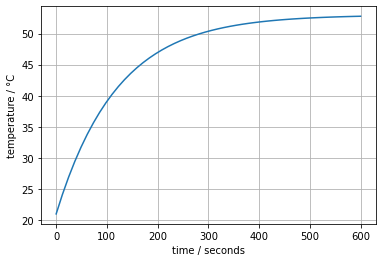

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# parameter values and units
alpha = 0.00016        # watts / (units P1 * percent U1)
P1 = 200               # P1 units
Ua = 0.05              # watts/deg C
Cp = 6                 # joules/deg C
U1 = 50                # steady state value of u1 (percent)
T_amb = 21             # deg C

# initial conditions
T1_dev_initial = 0

# steady state solution
T1_dev_ss = alpha*P1*U1/Ua

# compute the transient solution
t = np.linspace(0, 600)
T1_dev = T1_dev_ss + (T1_dev_initial - T1_dev_ss)*np.exp(-Ua*t/Cp)

# plot
fig, ax = plt.subplots(1, 1)
ax.plot(t, T1_dev + T_amb)
ax.set_xlabel('time / seconds')
ax.set_ylabel('temperature / °C')
ax.grid(True)

## Matching the Model to Experimental Data

The following cell provides an interactive tool for 'tuning' the model to fit the experimental data. Work with the sliders to find good choices for each of the parameters. 

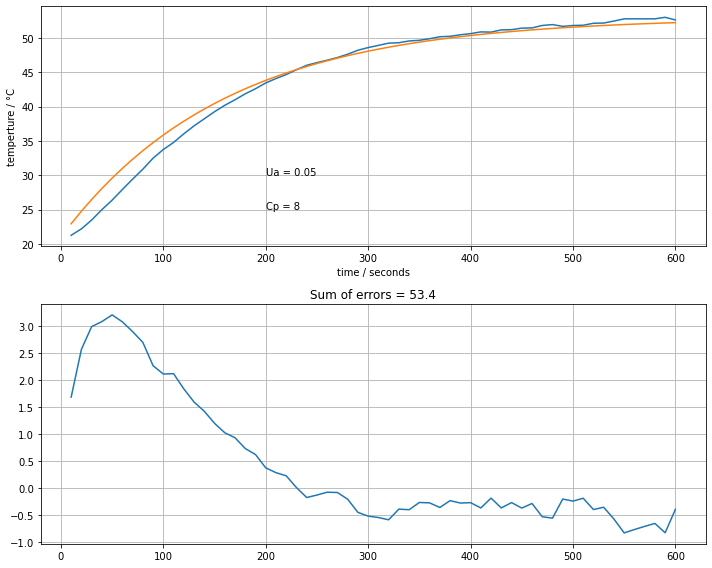

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data_file = "data/Model_Data.csv"
data = pd.read_csv("https://jckantor.github.io/cbe30338-2021/" + data_file).set_index("Time")[1:]
t = data.index
T1 = data['T1'].values

# parameter values and units
alpha = 0.00016        # watts / (units P1 * percent U1)
P1 = 200               # P1 units
Ua = 0.05              # watts/deg C
Cp = 6                 # joules/deg C
U1 = 50                # steady state value of u1 (percent)
T_amb = 21             # deg C

def compare(Ua, Cp):
    T1_dev_initial = 0
    T1_dev_ss = alpha*P1*U1/Ua
    T1_dev = T1_dev_ss + (T1_dev_initial - T1_dev_ss)*np.exp(-Ua*t/Cp)
    T1_model = T1_dev + T_amb
    
    fig, ax = plt.subplots(2, 1, figsize=(10,8))
    
    ax[0].plot(t, T1, t, T1_model)
    ax[0].set_xlabel('time / seconds')
    ax[0].set_ylabel('temperture / °C')
    ax[0].grid(True)

    ax[0].text(200, 30, f'Ua = {Ua}')
    ax[0].text(200, 25, f'Cp = {Cp}')
    
    ax[1].plot(t, T1_model - T1)
    ax[1].set_title(f'Sum of errors = {sum(abs(T1_model-T1)):0.1f}')
    ax[1].grid(True)
    
    plt.tight_layout()

compare(0.05, 8)

:::{admonition} Study Question

1. By trial and error using the `compare()` function defined above, tetermine values for $U_a$ and $C_p$ that yield a good fit of the model to the data. 

1. Are you able to remove all systematic error? If not, why not?

1. The sum of absolute errors is shown on the chart. Try to find values of $U_a$ and $C_p$ that minimize this error criterion. In your opinion, is that the best choice of model parameters? Why or why not?

1. Does this solution make sense? The [specific heat capacity for solids](https://en.wikipedia.org/wiki/Heat_capacity) is typically has values in the range of 0.2 to 0.9 watts/degC/gram. Using a value of 0.9 that is typical of aluminum and plastics used for electronic products, what would be the estimated mass of the heater/sensor combination?

1. Suppose we want to improve the model. Where should we go from here?  

:::

## Exercises

1. This notebook attempted to fit a first-order model of a heater/sensor assembly to experimental data. In the course of the fit, estimates were derived for parameters $\alpha$, P1, $U_a$, and $C_p$. From these parameter values, estimate a time constant. 

2. Apply the techniques outlined in Section 2.2 for the estimation of time constants from experimental data. How does that value compare to the calculation in the first question?

3. One idea to improve the fit of the model to the data would be add an additional adjustable parameter. Suppose we assume $T_amb$ isn't measured. Create a new notebook. Based on the code cell above where the function `compare` is defined, create a new function called `compare3` that takes accepts parameters $T_amb$, $Ua$, and $Cp$ and compares prediction to experimental data. By trial and error, find values of the three parameters that best 'fit' the data.  Were you able to reduce the structural error in the model? Discuss your result.